In [ ]:
!pip install shap >None

# Catboost

In [ ]:
!pip install numpy==1.23.5
!pip uninstall catboost -y
!pip install catboost

Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)


## Coer

Training CatBoost...
CatBoost - RMSE (CV): 0.2911, Q² (CV): 0.8107, MAE (CV): 0.1973
CatBoost - Validation RMSE: 0.3341, Validation R²: 0.7510, Validation MAE: 0.2108
CatBoost - Test RMSE: 0.2676, Test R²: 0.8294, Test MAE: 0.1791
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: 0.4116409832297904, 3.8012917965288535
Min/Max y_pred_list: 0.5163536778091382, 3.768113234743019
Min/Max y_val: 0.425614042013261, 3.73014483300194
Min/Max y_val_pred: 0.5854980062866928, 3.7267911482359035
Min/Max y_test: 0.4684883574810683, 3.7713385425395742
Min/Max y_test_pred: 0.5855040663056887, 3.808602889773647


<ipython-input-1-e6a38a0085cd>:201: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-1-e6a38a0085cd>:202: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


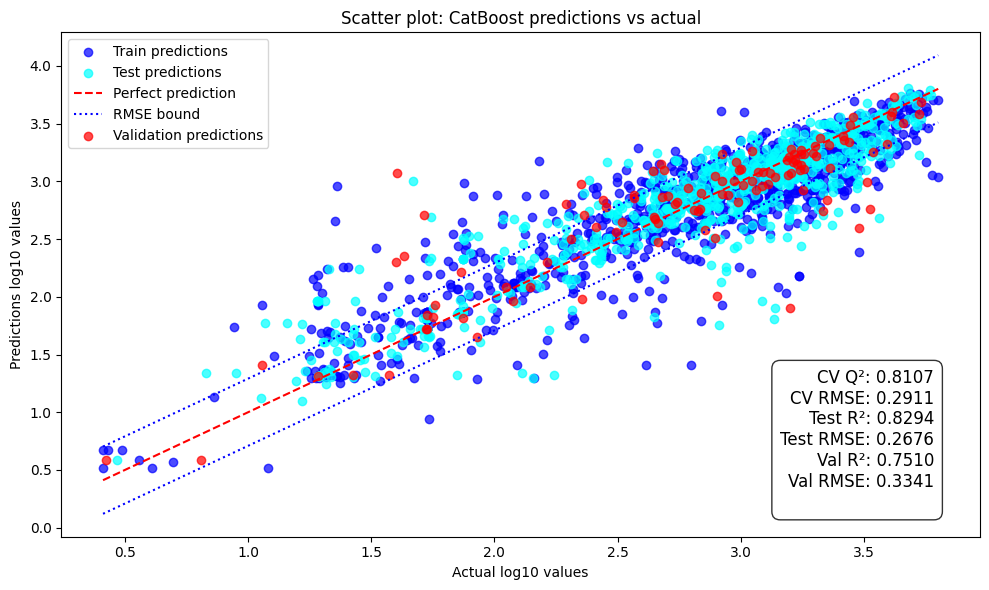

Training CatBoost_2...
CatBoost_2 - RMSE (CV): 0.2973, Q² (CV): 0.8026, MAE (CV): 0.2118
CatBoost_2 - Validation RMSE: 0.3186, Validation R²: 0.7736, Validation MAE: 0.2060
CatBoost_2 - Test RMSE: 0.2748, Test R²: 0.8201, Test MAE: 0.1920
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: 0.4116409832297904, 3.8012917965288535
Min/Max y_pred_list: 0.566334970272317, 3.7530152025131325
Min/Max y_val: 0.425614042013261, 3.73014483300194
Min/Max y_val_pred: 0.612026131137859, 3.6699906322932003
Min/Max y_test: 0.4684883574810683, 3.7713385425395742
Min/Max y_test_pred: 0.6335074228345938, 3.8218925377035227


<ipython-input-1-e6a38a0085cd>:201: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-1-e6a38a0085cd>:202: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


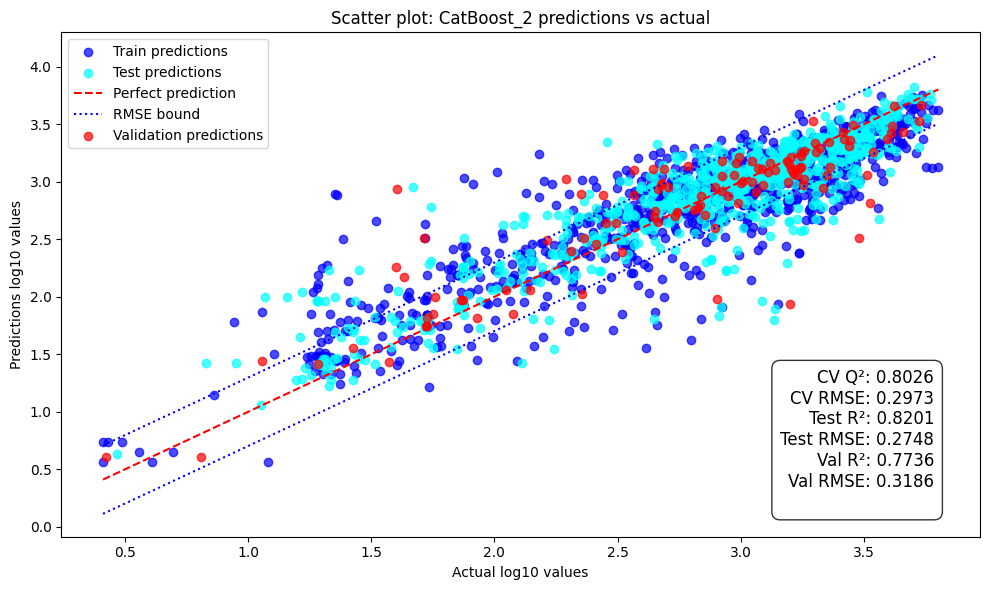

Training CatBoost_3...
CatBoost_3 - RMSE (CV): 0.3039, Q² (CV): 0.7940, MAE (CV): 0.2182
CatBoost_3 - Validation RMSE: 0.3293, Validation R²: 0.7580, Validation MAE: 0.2150
CatBoost_3 - Test RMSE: 0.2790, Test R²: 0.8145, Test MAE: 0.1999
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: 0.4116409832297904, 3.8012917965288535
Min/Max y_pred_list: 0.638395803684014, 3.704120622194701
Min/Max y_val: 0.425614042013261, 3.73014483300194
Min/Max y_val_pred: 0.6532064917520399, 3.6660384889810844
Min/Max y_test: 0.4684883574810683, 3.7713385425395742
Min/Max y_test_pred: 0.7063047770755682, 3.8057261961950415


<ipython-input-1-e6a38a0085cd>:201: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-1-e6a38a0085cd>:202: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


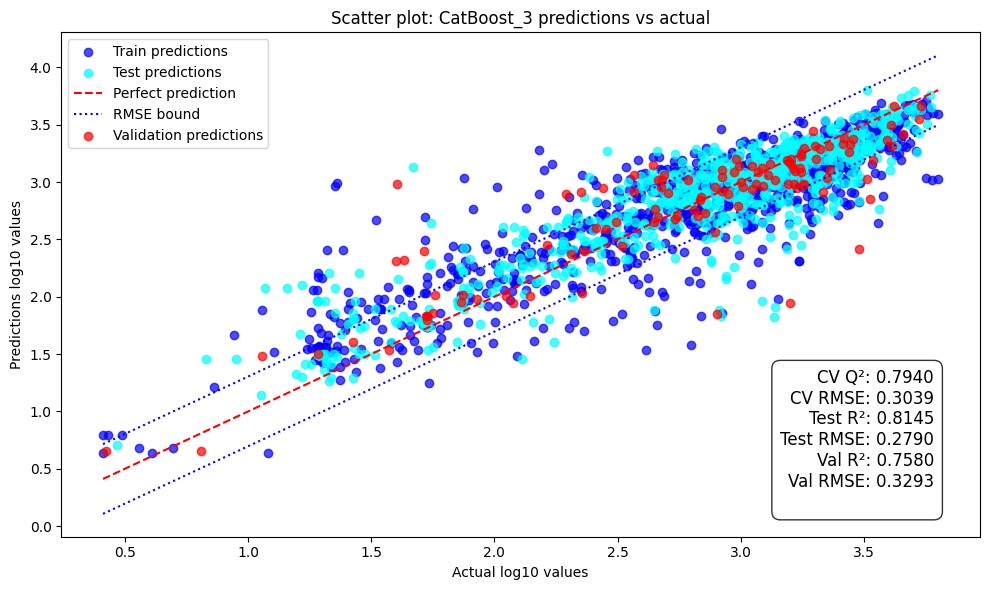

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("/content/Megy_final.csv")
df = df.drop(columns=['x', 'y', 'z', 'link', 'orig_c1', 'orig_c2'])

rename_dict = {
    'space_group_core': 'Space group (Core)',
    'space_group_shell': 'Space group (Shell)',
    'Tc': 'Temperature Curie (Tc)',
    'shape': 'Particle shape',
    'temperature_k': 'Temperature (K)',
    'h_range_max_koe': 'Max field range (kOe)',
    'sat_em_g': 'Saturation magnetization (emu/g)',
    'coer_oe': 'Coercivity (Oe)',
    'mr (emu/g)': 'Remanence magnetization (emu/g)',
    'sphericity': 'Sphericity',
    'max/min': 'Max/Min ratio',
    'area/volume': 'Area/Volume ratio',
    'num_of_magn_ions': 'Magnetic ions count',
    'core_b': 'Core B',
    'core_alpha': 'Core alpha',
    'core_beta': 'Core beta',
    'core_gamma': 'Core gamma',
    'shell_b': 'Shell B',
    'shell_alpha': 'Shell alpha',
    'shell_beta': 'Shell beta',
    'shell_gamma': 'Shell gamma',
    'Aex': 'Exchange stiffness constant (Aex)',
    'core_c/a': 'Core c/a',
    'shell_c/a': 'Shell c/a',
}

def smart_rename(col):
    return rename_dict.get(col, col.capitalize())

df.rename(columns=lambda col: smart_rename(col), inplace=True)

# Preprocessing
y = df['Coercivity (Oe)']
y = y[y > 0]  # Filter only positive values

# Apply smoothing to the target variable
y_smooth = gaussian_filter1d(y, sigma=2)
# Logarithmic transformation of the smoothed target variable
y_log = np.log10(y_smooth)

# Feature generation
X = df[df['Coercivity (Oe)'] > 0].drop(columns=['Coercivity (Oe)'])

# Apply KNN Imputer to fill missing values
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_log, test_size=0.4, random_state=1984)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1984)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Определяем три модели CatBoost
models = {
    'CatBoost': CatBoostRegressor(
        depth=9, learning_rate=0.1813589694652727, iterations=1416,
        l2_leaf_reg=1.92156764720926, random_strength=3.9180339645014466, border_count=44,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    ),
    'CatBoost_2': CatBoostRegressor(
        depth=6, learning_rate=0.02350809494421591, iterations=1772,
        l2_leaf_reg=6.281928908363124, random_strength=5.563772876644104, border_count=90,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    ),
    'CatBoost_3': CatBoostRegressor(
        depth=6, learning_rate= 0.01173118336963207, iterations=1671,
        l2_leaf_reg=0.3127100736485782, random_strength=9.077, border_count=184,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    )
}

# Cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1984)

#_train = np.array(y_train)

# Dictionary to store MAE values for all models
mae_results = {}

# Model cycle
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Metric storage arrays
    mse_scores = []
    rmse_scores = []
    q2_scores = []
    mae_scores = []  # Array for MAE during cross-validation

    # Model learning and prediction
    y_pred_list = []
    y_true_list = []

    # Cross-validation cycle
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Model training in current fold
        model.fit(X_train_fold, y_train_fold)

        # Prediction on test set (fold)
        y_pred = model.predict(X_test_fold)

        # Preserving predictions and true values
        y_pred_list.extend(y_pred)
        y_true_list.extend(y_test_fold)

        # Calculating fold metrics
        mse = mean_squared_error(y_test_fold, y_pred)
        rmse = np.sqrt(mse)
        q2 = r2_score(y_test_fold, y_pred)
        mae = mean_absolute_error(y_test_fold, y_pred)  # Calculate MAE

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        q2_scores.append(q2)
        mae_scores.append(mae)  # Store MAE for each fold

    # Cross-validation metric averages
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_q2 = np.mean(q2_scores)
    avg_mae = np.mean(mae_scores)  # Average MAE

    # Validation on separate dataset
    y_val_pred = model.predict(X_val_scaled)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)  # Calculate MAE for validation

    # Test on common training set
    model.fit(X_train_scaled, y_train)  # Learning on the whole training set
    y_test_pred = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)  # Calculate MAE for test

    # Output metric values
    print(f"{model_name} - RMSE (CV): {avg_rmse:.4f}, Q² (CV): {avg_q2:.4f}, MAE (CV): {avg_mae:.4f}")
    print(f"{model_name} - Validation RMSE: {val_rmse:.4f}, Validation R²: {val_r2:.4f}, Validation MAE: {val_mae:.4f}")
    print(f"{model_name} - Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}, Test MAE: {test_mae:.4f}")

    # Store MAE results for this model
    mae_results[model_name] = {
        'Train MAE (CV)': avg_mae,
        'Validation MAE': val_mae,
        'Test MAE': test_mae
    }

    # Visualization of predictions on the graph
    fig, ax = plt.subplots(figsize=(10, 6))

    # List content check
    print(f"y_true_list length: {len(y_true_list)}, y_pred_list length: {len(y_pred_list)}")
    print(f"y_val length: {len(y_val)}, y_val_pred length: {len(y_val_pred)}")
    print(f"y_test length: {len(y_test)}, y_test_pred length: {len(y_test_pred)}")

    # Checking minimum and maximum values
    print(f"Min/Max y_true_list: {min(y_true_list)}, {max(y_true_list)}")
    print(f"Min/Max y_pred_list: {min(y_pred_list)}, {max(y_pred_list)}")
    print(f"Min/Max y_val: {min(y_val)}, {max(y_val)}")
    print(f"Min/Max y_val_pred: {min(y_val_pred)}, {max(y_val_pred)}")
    print(f"Min/Max y_test: {min(y_test)}, {max(y_test)}")
    print(f"Min/Max y_test_pred: {min(y_test_pred)}, {max(y_test_pred)}")

    # charting
    if len(y_true_list) > 0 and len(y_pred_list) > 0:  # Check that the lists are not empty
        ax.scatter(y_true_list, y_pred_list, alpha=0.7, color='blue', label='Train predictions')
    if len(y_test) > 0 and len(y_test_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_test, y_test_pred, alpha=0.7, color='cyan', label='Test predictions')

    # Boundary RMSE drawing
    ideal_line = np.linspace(min(y_true_list), max(y_true_list), 100)
    ax.plot(ideal_line, ideal_line, 'r--', label='Perfect prediction')
    ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
    ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')

    if len(y_val) > 0 and len(y_val_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_val, y_val_pred, alpha=0.7, color='red', label='Validation predictions')

    # Adding metrics to the chart
    metrics_text = (
        f"CV Q²: {avg_q2:.4f}\n"
        f"CV RMSE: {avg_rmse:.4f}\n"
        f"Test R²: {test_r2:.4f}\n"
        f"Test RMSE: {test_rmse:.4f}\n"
        f"Val R²: {val_r2:.4f}\n"
        f"Val RMSE: {val_rmse:.4f}\n"
    )
    ax.text(0.95, 0.05, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='black'))

    # Graphics customization
    ax.set_title(f'Scatter plot: {model_name} predictions vs actual')
    ax.set_xlabel('Actual log10 values')
    ax.set_ylabel('Predictions log10 values')
    ax.legend()
    plt.tight_layout()
    plt.show()

### SHAP

In [ ]:
import shap

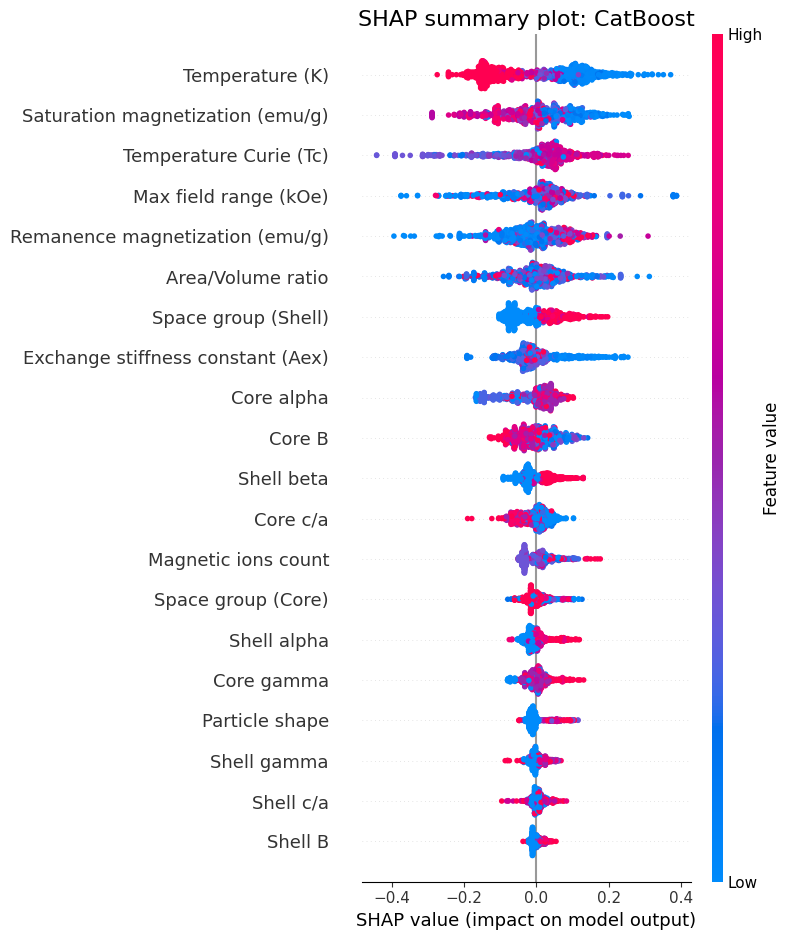

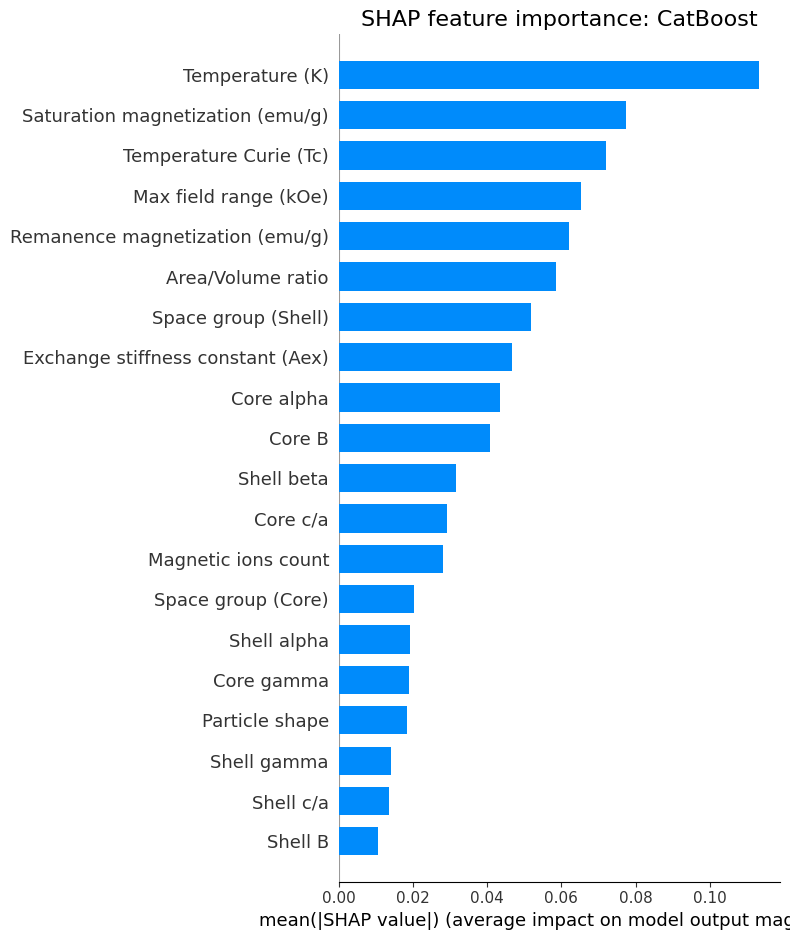

In [ ]:
# Select the CatBoost model
model = models['CatBoost']
model.fit(X_train_scaled, y_train)

# Create SHAP explainer for CatBoost
explainer = shap.Explainer(model)

# Compute SHAP values for the training set
shap_values = explainer(X_train_scaled)

# SHAP summary plot
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X.columns, show=False)
plt.title("SHAP summary plot: CatBoost", fontsize=16)
plt.tight_layout()
plt.show()

# SHAP feature importance plot (bar)
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP feature importance: CatBoost", fontsize=16)
plt.tight_layout()
plt.show()

## Mr

Training CatBoost...
CatBoost - RMSE (CV): 0.2846, Q² (CV): 0.7585, MAE (CV): 0.1839
CatBoost - Validation RMSE: 0.3463, Validation R²: 0.6292, Validation MAE: 0.2052
CatBoost - Test RMSE: 0.2496, Test R²: 0.7530, Test MAE: 0.1611
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: -1.499087021228708, 2.3549516154516485
Min/Max y_pred_list: -1.1218640517507348, 1.98368675847384
Min/Max y_val: -1.2981224294566398, 1.8986326732538545
Min/Max y_val_pred: -0.8516233452087509, 1.6622707278581093
Min/Max y_test: -1.5725718907746693, 2.3923365190902603
Min/Max y_test_pred: -1.168020940136568, 2.277284785602488


<ipython-input-6-fc9070caf850>:204: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-6-fc9070caf850>:205: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


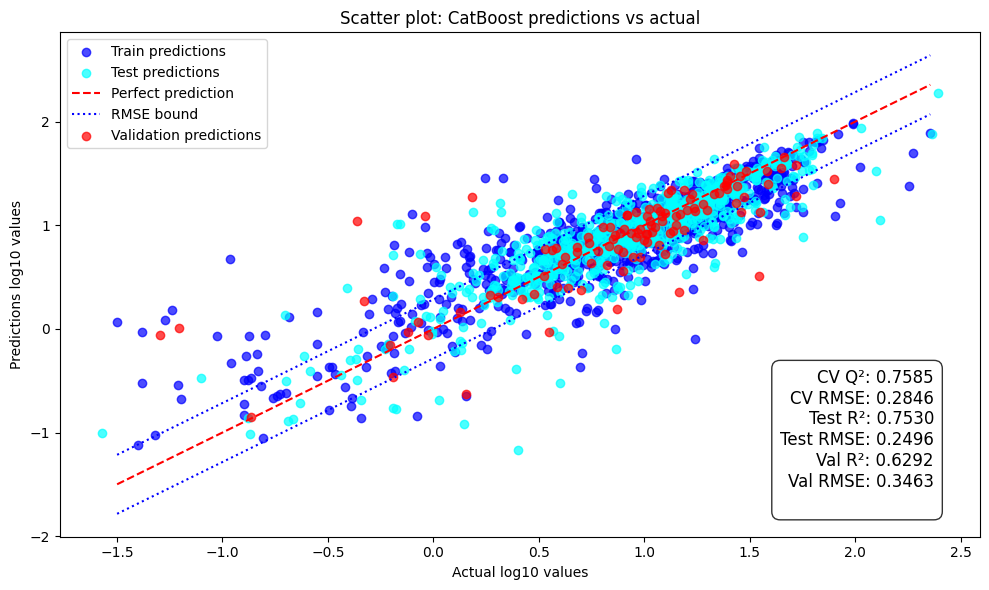

Training CatBoost_2...
CatBoost_2 - RMSE (CV): 0.2844, Q² (CV): 0.7588, MAE (CV): 0.1826
CatBoost_2 - Validation RMSE: 0.3552, Validation R²: 0.6099, Validation MAE: 0.1999
CatBoost_2 - Test RMSE: 0.2500, Test R²: 0.7522, Test MAE: 0.1590
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: -1.499087021228708, 2.3549516154516485
Min/Max y_pred_list: -1.0393943120213038, 1.976707692009802
Min/Max y_val: -1.2981224294566398, 1.8986326732538545
Min/Max y_val_pred: -0.8389609097718826, 1.6354590410788568
Min/Max y_test: -1.5725718907746693, 2.3923365190902603
Min/Max y_test_pred: -1.0614569102996199, 2.296926679205101


<ipython-input-6-fc9070caf850>:204: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-6-fc9070caf850>:205: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


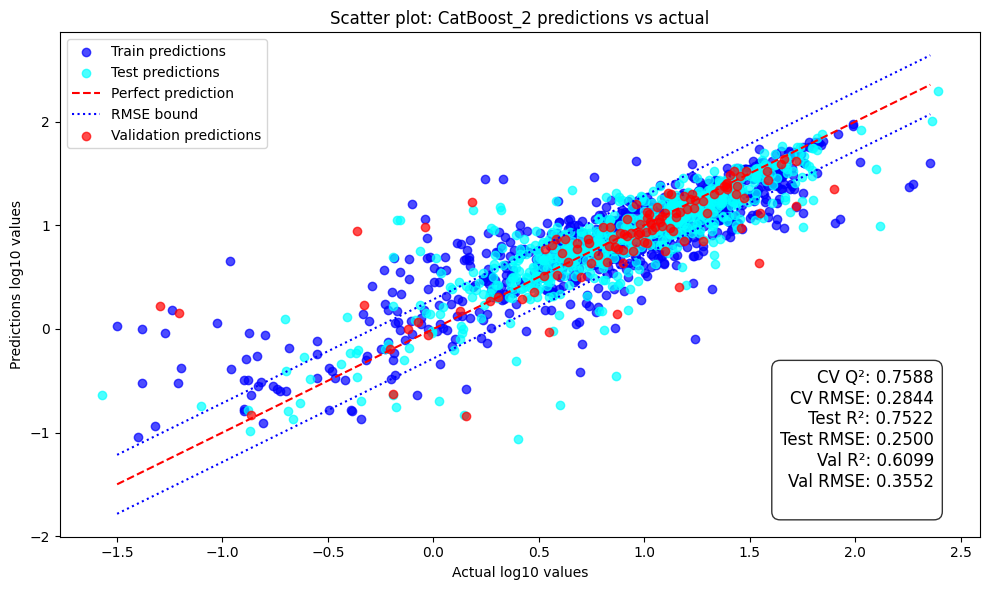

Training CatBoost_3...
CatBoost_3 - RMSE (CV): 0.2889, Q² (CV): 0.7505, MAE (CV): 0.1874
CatBoost_3 - Validation RMSE: 0.3624, Validation R²: 0.5939, Validation MAE: 0.2043
CatBoost_3 - Test RMSE: 0.2482, Test R²: 0.7559, Test MAE: 0.1601
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: -1.499087021228708, 2.3549516154516485
Min/Max y_pred_list: -0.8907774159519877, 1.9645602062322949
Min/Max y_val: -1.2981224294566398, 1.8986326732538545
Min/Max y_val_pred: -0.8239076505675578, 1.61825537378594
Min/Max y_test: -1.5725718907746693, 2.3923365190902603
Min/Max y_test_pred: -1.0040420109250194, 2.302120015511681


<ipython-input-6-fc9070caf850>:204: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-6-fc9070caf850>:205: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


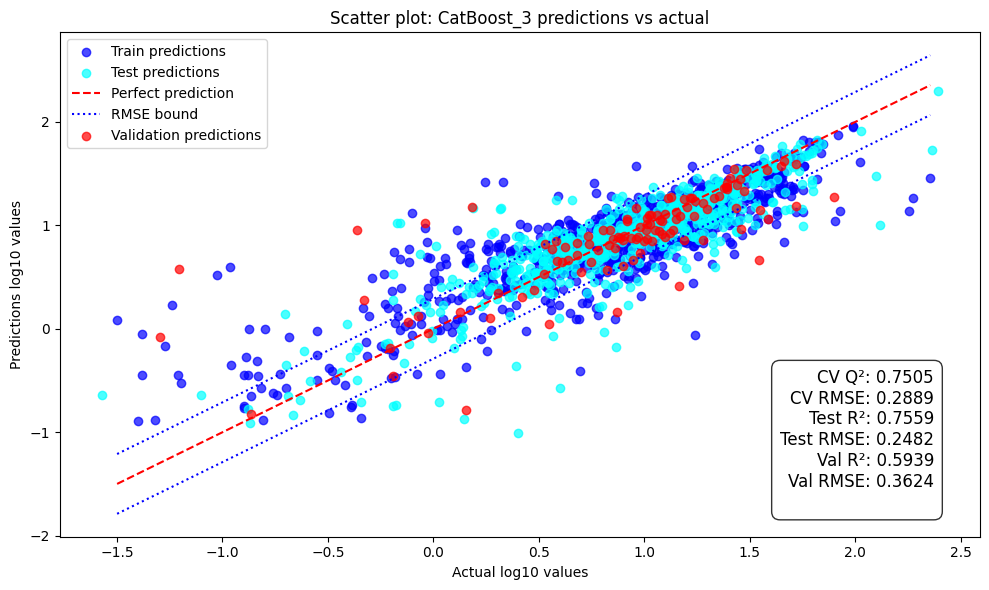

Training CatBoost_4...
CatBoost_4 - RMSE (CV): 0.2869, Q² (CV): 0.7541, MAE (CV): 0.1841
CatBoost_4 - Validation RMSE: 0.3429, Validation R²: 0.6365, Validation MAE: 0.2018
CatBoost_4 - Test RMSE: 0.2515, Test R²: 0.7494, Test MAE: 0.1632
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: -1.499087021228708, 2.3549516154516485
Min/Max y_pred_list: -0.9660237018797349, 1.9717211540222488
Min/Max y_val: -1.2981224294566398, 1.8986326732538545
Min/Max y_val_pred: -0.77981053124514, 1.6394037945262474
Min/Max y_test: -1.5725718907746693, 2.3923365190902603
Min/Max y_test_pred: -0.9375028065076734, 2.266633084004381


<ipython-input-6-fc9070caf850>:204: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-6-fc9070caf850>:205: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


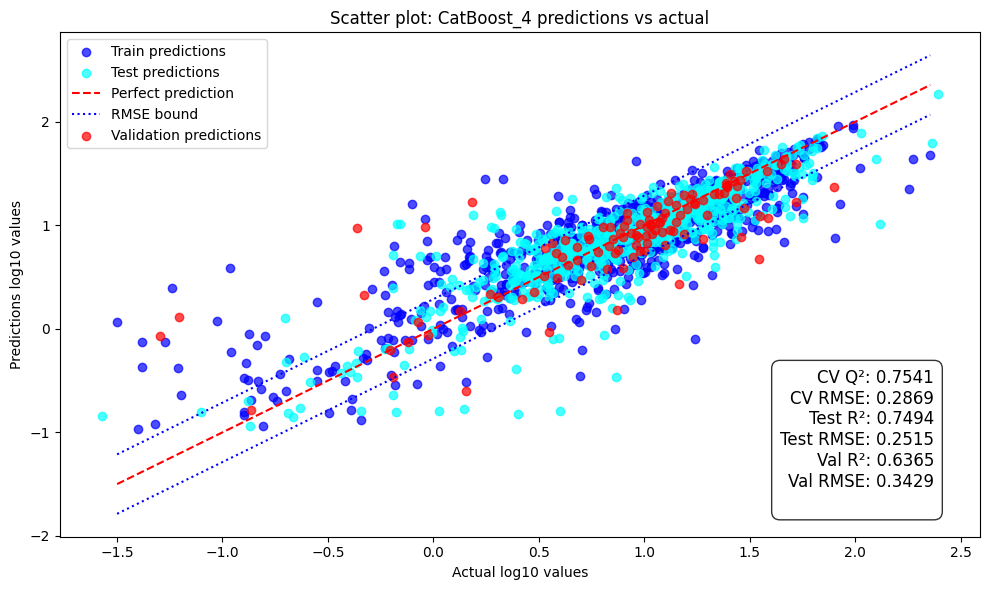

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("/content/Megy_final.csv")
df = df.drop(columns=['x', 'y', 'z', 'link', 'orig_c1', 'orig_c2'])

rename_dict = {
    'space_group_core': 'Space group (Core)',
    'space_group_shell': 'Space group (Shell)',
    'Tc': 'Temperature Curie (Tc)',
    'shape': 'Particle shape',
    'temperature_k': 'Temperature (K)',
    'h_range_max_koe': 'Max field range (kOe)',
    'sat_em_g': 'Saturation magnetization (emu/g)',
    'coer_oe': 'Coercivity (Oe)',
    'mr (emu/g)': 'Remanence magnetization (emu/g)',
    'sphericity': 'Sphericity',
    'max/min': 'Max/Min ratio',
    'area/volume': 'Area/Volume ratio',
    'num_of_magn_ions': 'Magnetic ions count',
    'core_b': 'Core B',
    'core_alpha': 'Core alpha',
    'core_beta': 'Core beta',
    'core_gamma': 'Core gamma',
    'shell_b': 'Shell B',
    'shell_alpha': 'Shell alpha',
    'shell_beta': 'Shell beta',
    'shell_gamma': 'Shell gamma',
    'Aex': 'Exchange stiffness constant (Aex)',
    'core_c/a': 'Core c/a',
    'shell_c/a': 'Shell c/a',
}

def smart_rename(col):
    return rename_dict.get(col, col.capitalize())

df.rename(columns=lambda col: smart_rename(col), inplace=True)

# Preprocessing
y = df['Remanence magnetization (emu/g)']
y = y[y > 0]  # Filter only positive values

# Apply smoothing to the target variable
y_smooth = gaussian_filter1d(y, sigma=2)
# Logarithmic transformation of the smoothed target variable
y_log = np.log10(y_smooth)

# Feature generation
X = df[df['Remanence magnetization (emu/g)'] > 0].drop(columns=['Remanence magnetization (emu/g)'])

# Apply KNN Imputer to fill missing values
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_log, test_size=0.4, random_state=1984)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1984)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Определяем три модели CatBoost
models = {
    'CatBoost': CatBoostRegressor(
        depth=9, learning_rate=0.08036944678587185, iterations=1468,
        l2_leaf_reg=0.007284499543683276, random_strength=1.862729712615268, border_count=176,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    ),
    'CatBoost_2': CatBoostRegressor(
        depth=10, learning_rate=0.03140891628449079, iterations=1923,
        l2_leaf_reg=0.03930409180410233, random_strength=2.53334986325264, border_count=167,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    ),
    'CatBoost_3': CatBoostRegressor(
        depth=10, learning_rate=0.012775957613793971, iterations=1180,
        l2_leaf_reg=0.010646020725472041, random_strength=0.6088343316325844, border_count=231,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    ),
    'CatBoost_4': CatBoostRegressor(
        depth=10, learning_rate=0.07469901483901197, iterations=1375,
        l2_leaf_reg=0.11953054928341782, random_strength=2.0318783133619442, border_count=209,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    )
}
# Cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1984)

#_train = np.array(y_train)

# Dictionary to store MAE values for all models
mae_results = {}

# Model cycle
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Metric storage arrays
    mse_scores = []
    rmse_scores = []
    q2_scores = []
    mae_scores = []  # Array for MAE during cross-validation

    # Model learning and prediction
    y_pred_list = []
    y_true_list = []

    # Cross-validation cycle
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Model training in current fold
        model.fit(X_train_fold, y_train_fold)

        # Prediction on test set (fold)
        y_pred = model.predict(X_test_fold)

        # Preserving predictions and true values
        y_pred_list.extend(y_pred)
        y_true_list.extend(y_test_fold)

        # Calculating fold metrics
        mse = mean_squared_error(y_test_fold, y_pred)
        rmse = np.sqrt(mse)
        q2 = r2_score(y_test_fold, y_pred)
        mae = mean_absolute_error(y_test_fold, y_pred)  # Calculate MAE

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        q2_scores.append(q2)
        mae_scores.append(mae)  # Store MAE for each fold

    # Cross-validation metric averages
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_q2 = np.mean(q2_scores)
    avg_mae = np.mean(mae_scores)  # Average MAE

    # Validation on separate dataset
    y_val_pred = model.predict(X_val_scaled)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)  # Calculate MAE for validation

    # Test on common training set
    model.fit(X_train_scaled, y_train)  # Learning on the whole training set
    y_test_pred = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)  # Calculate MAE for test

    # Output metric values
    print(f"{model_name} - RMSE (CV): {avg_rmse:.4f}, Q² (CV): {avg_q2:.4f}, MAE (CV): {avg_mae:.4f}")
    print(f"{model_name} - Validation RMSE: {val_rmse:.4f}, Validation R²: {val_r2:.4f}, Validation MAE: {val_mae:.4f}")
    print(f"{model_name} - Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}, Test MAE: {test_mae:.4f}")

    # Store MAE results for this model
    mae_results[model_name] = {
        'Train MAE (CV)': avg_mae,
        'Validation MAE': val_mae,
        'Test MAE': test_mae
    }

    # Visualization of predictions on the graph
    fig, ax = plt.subplots(figsize=(10, 6))

    # List content check
    print(f"y_true_list length: {len(y_true_list)}, y_pred_list length: {len(y_pred_list)}")
    print(f"y_val length: {len(y_val)}, y_val_pred length: {len(y_val_pred)}")
    print(f"y_test length: {len(y_test)}, y_test_pred length: {len(y_test_pred)}")

    # Checking minimum and maximum values
    print(f"Min/Max y_true_list: {min(y_true_list)}, {max(y_true_list)}")
    print(f"Min/Max y_pred_list: {min(y_pred_list)}, {max(y_pred_list)}")
    print(f"Min/Max y_val: {min(y_val)}, {max(y_val)}")
    print(f"Min/Max y_val_pred: {min(y_val_pred)}, {max(y_val_pred)}")
    print(f"Min/Max y_test: {min(y_test)}, {max(y_test)}")
    print(f"Min/Max y_test_pred: {min(y_test_pred)}, {max(y_test_pred)}")

    # charting
    if len(y_true_list) > 0 and len(y_pred_list) > 0:  # Check that the lists are not empty
        ax.scatter(y_true_list, y_pred_list, alpha=0.7, color='blue', label='Train predictions')
    if len(y_test) > 0 and len(y_test_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_test, y_test_pred, alpha=0.7, color='cyan', label='Test predictions')

    # Boundary RMSE drawing
    ideal_line = np.linspace(min(y_true_list), max(y_true_list), 100)
    ax.plot(ideal_line, ideal_line, 'r--', label='Perfect prediction')
    ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
    ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')

    if len(y_val) > 0 and len(y_val_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_val, y_val_pred, alpha=0.7, color='red', label='Validation predictions')

    # Adding metrics to the chart
    metrics_text = (
        f"CV Q²: {avg_q2:.4f}\n"
        f"CV RMSE: {avg_rmse:.4f}\n"
        f"Test R²: {test_r2:.4f}\n"
        f"Test RMSE: {test_rmse:.4f}\n"
        f"Val R²: {val_r2:.4f}\n"
        f"Val RMSE: {val_rmse:.4f}\n"
    )
    ax.text(0.95, 0.05, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='black'))

    # Graphics customization
    ax.set_title(f'Scatter plot: {model_name} predictions vs actual')
    ax.set_xlabel('Actual log10 values')
    ax.set_ylabel('Predictions log10 values')
    ax.legend()
    plt.tight_layout()
    plt.show()

### SHAP

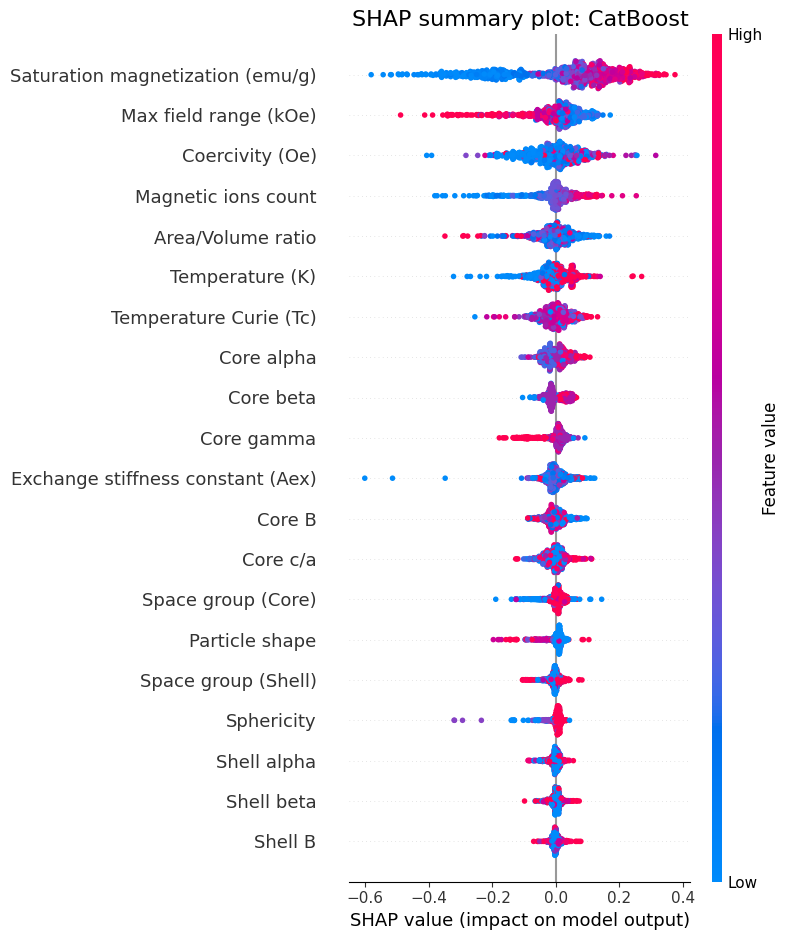

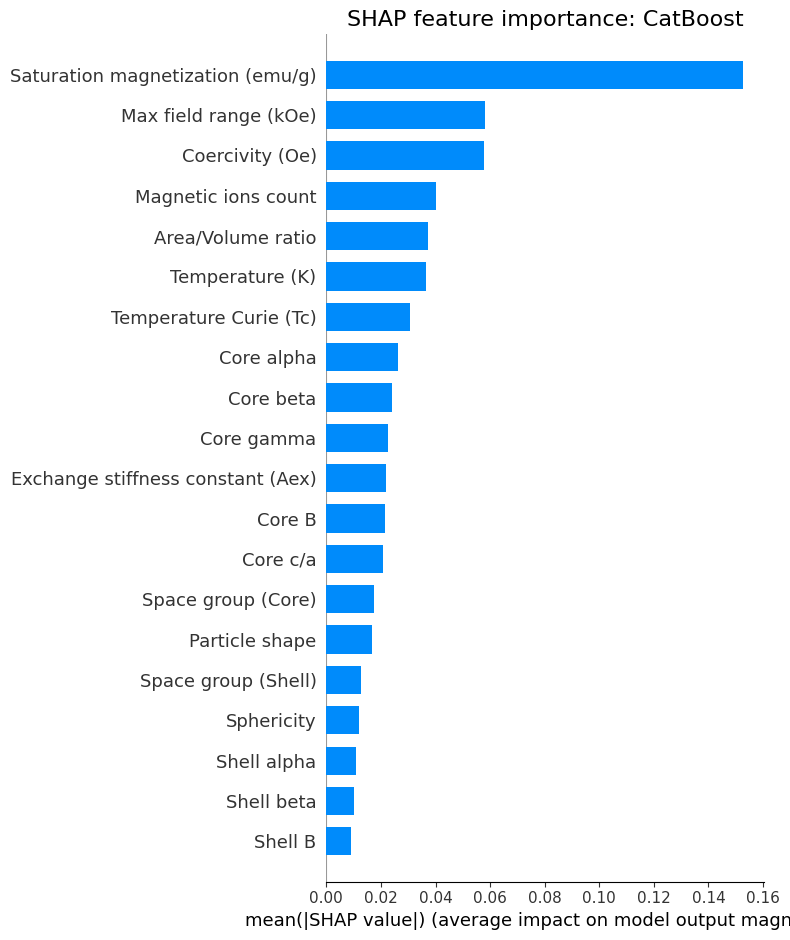

In [ ]:
# Select the CatBoost model
model = models['CatBoost']
model.fit(X_train_scaled, y_train)

# Create SHAP explainer for CatBoost
explainer = shap.Explainer(model)

# Compute SHAP values for the training set
shap_values = explainer(X_train_scaled)

# SHAP summary plot
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X.columns, show=False)
plt.title("SHAP summary plot: CatBoost", fontsize=16)
plt.tight_layout()
plt.show()

# SHAP feature importance plot (bar)
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP feature importance: CatBoost", fontsize=16)
plt.tight_layout()
plt.show()

## Sat

Training CatBoost...
CatBoost - RMSE (CV): 0.1622, Q² (CV): 0.8176, MAE (CV): 0.1040
CatBoost - Validation RMSE: 0.1865, Validation R²: 0.7031, Validation MAE: 0.1140
CatBoost - Test RMSE: 0.1549, Test R²: 0.8018, Test MAE: 0.0955
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: -0.1602750479033614, 2.1568286243733423
Min/Max y_pred_list: 0.0220653510668114, 2.146352953156879
Min/Max y_val: 0.26591364150239494, 1.9711387173060353
Min/Max y_val_pred: 0.014700927367291783, 1.9676274074655902
Min/Max y_test: -0.19934034039261317, 2.150968323897024
Min/Max y_test_pred: 0.21423947613218397, 2.1465966610198657


<ipython-input-9-c89addeac6f3>:195: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-9-c89addeac6f3>:196: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


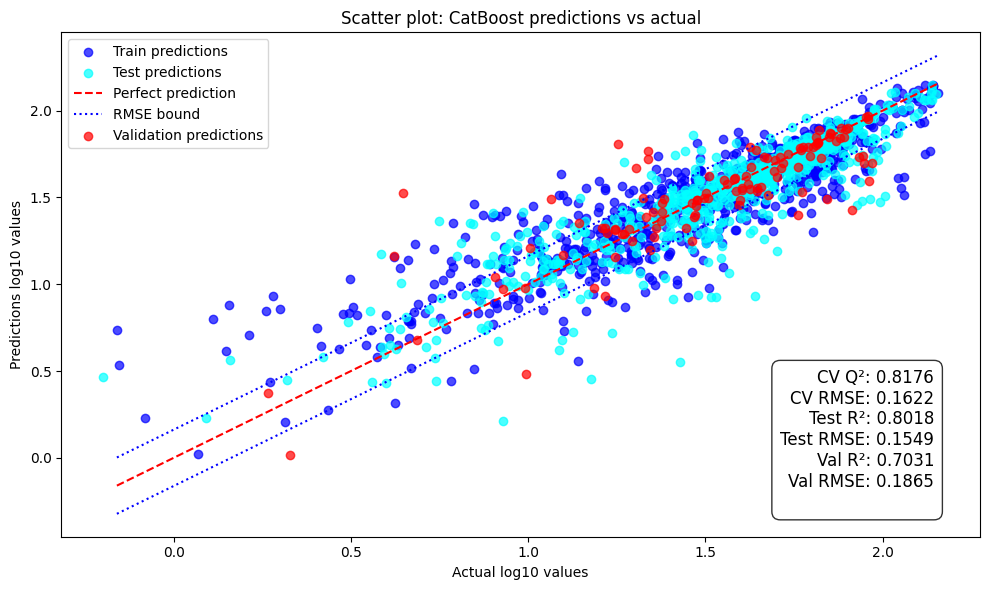

Training CatBoost_2...
CatBoost_2 - RMSE (CV): 0.1623, Q² (CV): 0.8175, MAE (CV): 0.1038
CatBoost_2 - Validation RMSE: 0.1808, Validation R²: 0.7212, Validation MAE: 0.1111
CatBoost_2 - Test RMSE: 0.1583, Test R²: 0.7931, Test MAE: 0.0973
y_true_list length: 1025, y_pred_list length: 1025
y_val length: 114, y_val_pred length: 114
y_test length: 760, y_test_pred length: 760
Min/Max y_true_list: -0.1602750479033614, 2.1568286243733423
Min/Max y_pred_list: 0.02102277226367355, 2.157906296472211
Min/Max y_val: 0.26591364150239494, 1.9711387173060353
Min/Max y_val_pred: 0.01730324934300964, 1.971340044953322
Min/Max y_test: -0.19934034039261317, 2.150968323897024
Min/Max y_test_pred: 0.14527384260804777, 2.144673782524485


<ipython-input-9-c89addeac6f3>:195: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-9-c89addeac6f3>:196: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


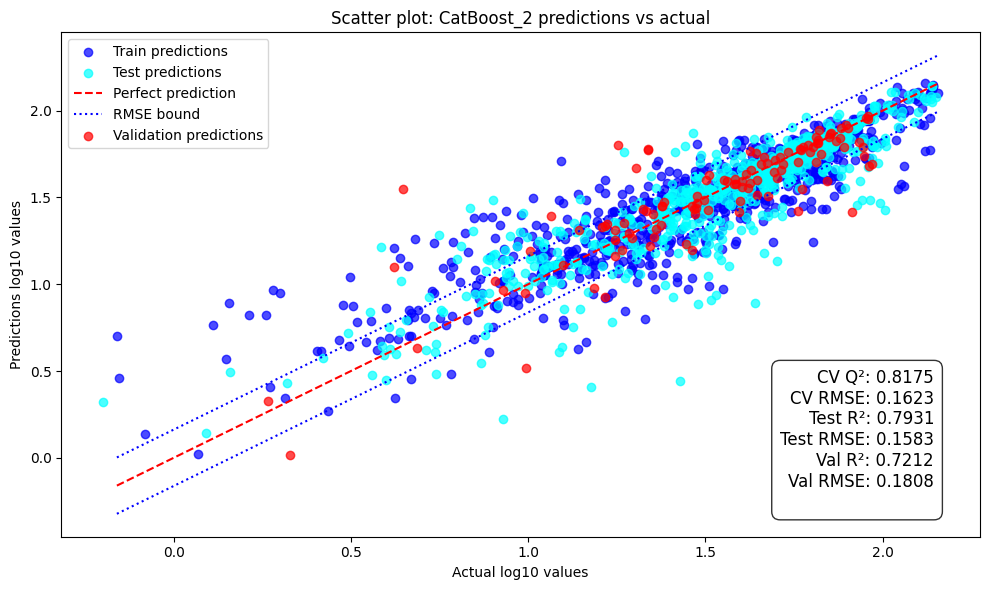

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("/content/Megy_final.csv")
df = df.drop(columns=['x', 'y', 'z', 'link', 'orig_c1', 'orig_c2'])

rename_dict = {
    'space_group_core': 'Space group (Core)',
    'space_group_shell': 'Space group (Shell)',
    'Tc': 'Temperature Curie (Tc)',
    'shape': 'Particle shape',
    'temperature_k': 'Temperature (K)',
    'h_range_max_koe': 'Max field range (kOe)',
    'sat_em_g': 'Saturation magnetization (emu/g)',
    'coer_oe': 'Coercivity (Oe)',
    'mr (emu/g)': 'Remanence magnetization (emu/g)',
    'sphericity': 'Sphericity',
    'max/min': 'Max/Min ratio',
    'area/volume': 'Area/Volume ratio',
    'num_of_magn_ions': 'Magnetic ions count',
    'core_b': 'Core B',
    'core_alpha': 'Core alpha',
    'core_beta': 'Core beta',
    'core_gamma': 'Core gamma',
    'shell_b': 'Shell B',
    'shell_alpha': 'Shell alpha',
    'shell_beta': 'Shell beta',
    'shell_gamma': 'Shell gamma',
    'Aex': 'Exchange stiffness constant (Aex)',
    'core_c/a': 'Core c/a',
    'shell_c/a': 'Shell c/a',
}

def smart_rename(col):
    return rename_dict.get(col, col.capitalize())

df.rename(columns=lambda col: smart_rename(col), inplace=True)

# Preprocessing
y = df['Saturation magnetization (emu/g)']
y = y[y > 0]  # Filter only positive values

# Apply smoothing to the target variable
y_smooth = gaussian_filter1d(y, sigma=2)
# Logarithmic transformation of the smoothed target variable
y_log = np.log10(y_smooth)

# Feature generation
X = df[df['Saturation magnetization (emu/g)'] > 0].drop(columns=['Saturation magnetization (emu/g)'])

# Apply KNN Imputer to fill missing values
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_log, test_size=0.4, random_state=1984)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1984)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Определяем три модели CatBoost
models = {
    'CatBoost': CatBoostRegressor(
        depth=10, learning_rate=0.02368533485377013, iterations=1928,
        l2_leaf_reg=0.0011724469642170757, random_strength=3.787937314253531, border_count=249,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    ),
    'CatBoost_2': CatBoostRegressor(
        depth=9, learning_rate=0.049985447779674216, iterations=1050,
        l2_leaf_reg=0.036401640206260376, random_strength=7.985967785919908, border_count=97,
        loss_function='RMSE', eval_metric='R2', random_seed=1984, verbose=0
    )
}

# Cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1984)

#_train = np.array(y_train)

# Dictionary to store MAE values for all models
mae_results = {}

# Model cycle
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Metric storage arrays
    mse_scores = []
    rmse_scores = []
    q2_scores = []
    mae_scores = []  # Array for MAE during cross-validation

    # Model learning and prediction
    y_pred_list = []
    y_true_list = []

    # Cross-validation cycle
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Model training in current fold
        model.fit(X_train_fold, y_train_fold)

        # Prediction on test set (fold)
        y_pred = model.predict(X_test_fold)

        # Preserving predictions and true values
        y_pred_list.extend(y_pred)
        y_true_list.extend(y_test_fold)

        # Calculating fold metrics
        mse = mean_squared_error(y_test_fold, y_pred)
        rmse = np.sqrt(mse)
        q2 = r2_score(y_test_fold, y_pred)
        mae = mean_absolute_error(y_test_fold, y_pred)  # Calculate MAE

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        q2_scores.append(q2)
        mae_scores.append(mae)  # Store MAE for each fold

    # Cross-validation metric averages
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_q2 = np.mean(q2_scores)
    avg_mae = np.mean(mae_scores)  # Average MAE

    # Validation on separate dataset
    y_val_pred = model.predict(X_val_scaled)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)  # Calculate MAE for validation

    # Test on common training set
    model.fit(X_train_scaled, y_train)  # Learning on the whole training set
    y_test_pred = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)  # Calculate MAE for test

    # Output metric values
    print(f"{model_name} - RMSE (CV): {avg_rmse:.4f}, Q² (CV): {avg_q2:.4f}, MAE (CV): {avg_mae:.4f}")
    print(f"{model_name} - Validation RMSE: {val_rmse:.4f}, Validation R²: {val_r2:.4f}, Validation MAE: {val_mae:.4f}")
    print(f"{model_name} - Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}, Test MAE: {test_mae:.4f}")

    # Store MAE results for this model
    mae_results[model_name] = {
        'Train MAE (CV)': avg_mae,
        'Validation MAE': val_mae,
        'Test MAE': test_mae
    }

    # Visualization of predictions on the graph
    fig, ax = plt.subplots(figsize=(10, 6))

    # List content check
    print(f"y_true_list length: {len(y_true_list)}, y_pred_list length: {len(y_pred_list)}")
    print(f"y_val length: {len(y_val)}, y_val_pred length: {len(y_val_pred)}")
    print(f"y_test length: {len(y_test)}, y_test_pred length: {len(y_test_pred)}")

    # Checking minimum and maximum values
    print(f"Min/Max y_true_list: {min(y_true_list)}, {max(y_true_list)}")
    print(f"Min/Max y_pred_list: {min(y_pred_list)}, {max(y_pred_list)}")
    print(f"Min/Max y_val: {min(y_val)}, {max(y_val)}")
    print(f"Min/Max y_val_pred: {min(y_val_pred)}, {max(y_val_pred)}")
    print(f"Min/Max y_test: {min(y_test)}, {max(y_test)}")
    print(f"Min/Max y_test_pred: {min(y_test_pred)}, {max(y_test_pred)}")

    # charting
    if len(y_true_list) > 0 and len(y_pred_list) > 0:  # Check that the lists are not empty
        ax.scatter(y_true_list, y_pred_list, alpha=0.7, color='blue', label='Train predictions')
    if len(y_test) > 0 and len(y_test_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_test, y_test_pred, alpha=0.7, color='cyan', label='Test predictions')

    # Boundary RMSE drawing
    ideal_line = np.linspace(min(y_true_list), max(y_true_list), 100)
    ax.plot(ideal_line, ideal_line, 'r--', label='Perfect prediction')
    ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
    ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')

    if len(y_val) > 0 and len(y_val_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_val, y_val_pred, alpha=0.7, color='red', label='Validation predictions')

    # Adding metrics to the chart
    metrics_text = (
        f"CV Q²: {avg_q2:.4f}\n"
        f"CV RMSE: {avg_rmse:.4f}\n"
        f"Test R²: {test_r2:.4f}\n"
        f"Test RMSE: {test_rmse:.4f}\n"
        f"Val R²: {val_r2:.4f}\n"
        f"Val RMSE: {val_rmse:.4f}\n"
    )
    ax.text(0.95, 0.05, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='black'))

    # Graphics customization
    ax.set_title(f'Scatter plot: {model_name} predictions vs actual')
    ax.set_xlabel('Actual log10 values')
    ax.set_ylabel('Predictions log10 values')
    ax.legend()
    plt.tight_layout()
    plt.show()

### SHAP

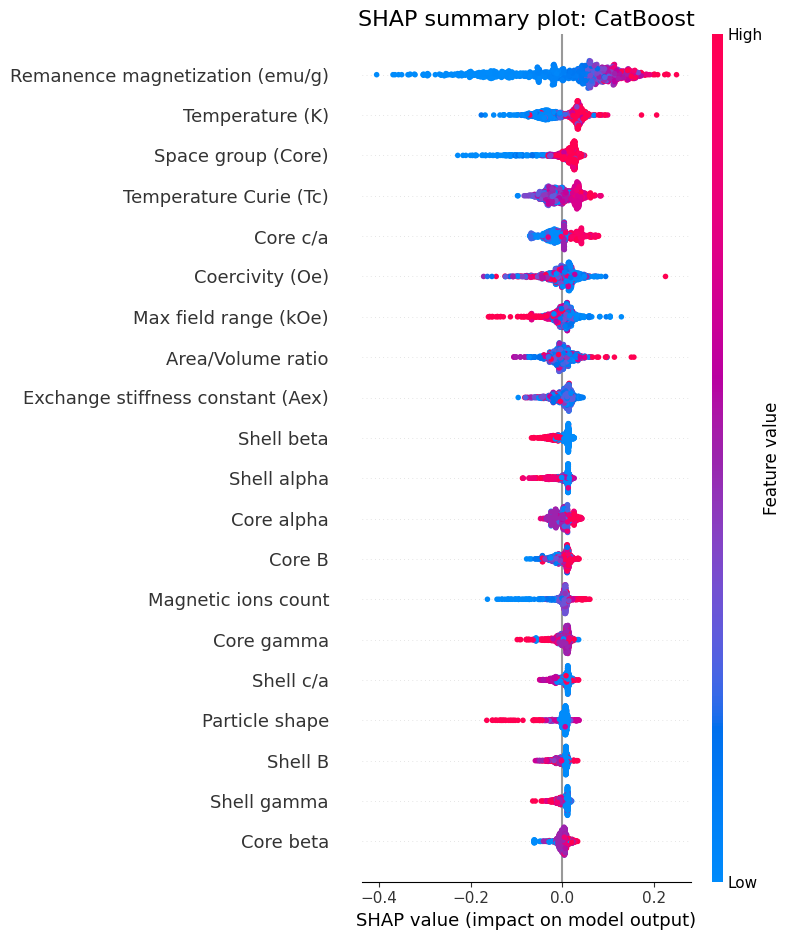

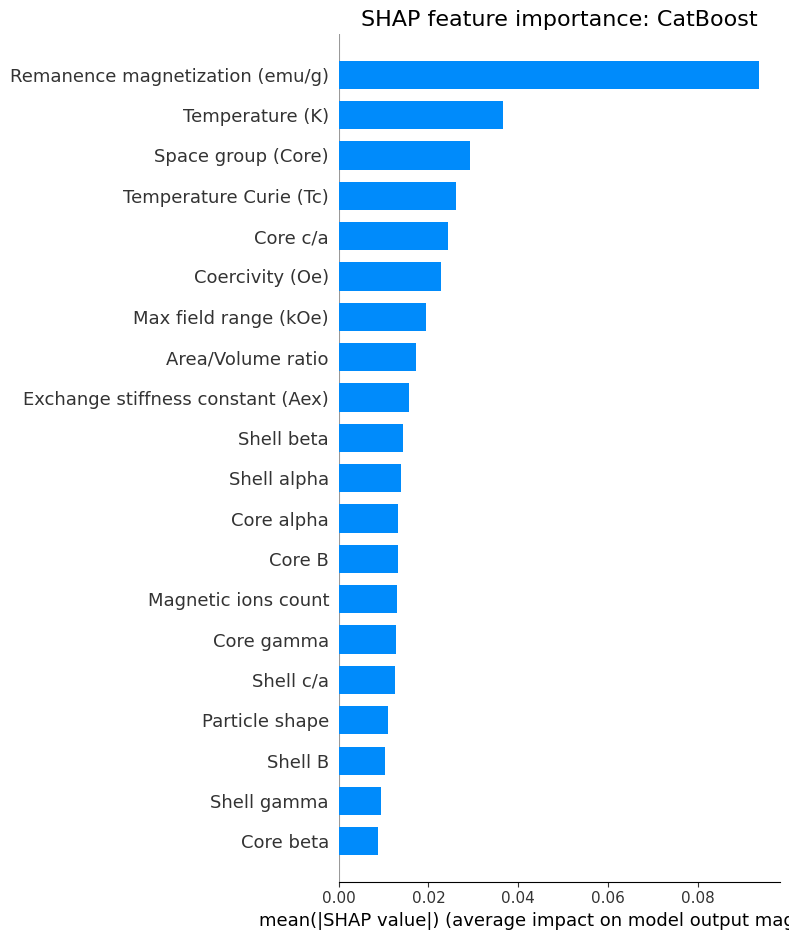

In [ ]:
# Select the CatBoost model
model = models['CatBoost']
model.fit(X_train_scaled, y_train)

# Create SHAP explainer for CatBoost
explainer = shap.Explainer(model)

# Compute SHAP values for the training set
shap_values = explainer(X_train_scaled)

# SHAP summary plot
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X.columns, show=False)
plt.title("SHAP summary plot: CatBoost", fontsize=16)
plt.tight_layout()
plt.show()

# SHAP feature importance plot (bar)
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP feature importance: CatBoost", fontsize=16)
plt.tight_layout()
plt.show()